# 📚 Imports
---

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📖 Data
---

In [124]:
df = pd.read_csv('data/SKX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1.291667,1.291667,1.208333,1.270833,1.270833,76800
1,2000-01-04,1.229167,1.270833,1.229167,1.250000,1.250000,108900
2,2000-01-05,1.208333,1.208333,1.166667,1.187500,1.187500,359100
3,2000-01-06,1.187500,1.208333,1.166667,1.166667,1.166667,207300
4,2000-01-07,1.145833,1.208333,1.145833,1.208333,1.208333,228000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853 entries, 0 to 5852
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5853 non-null   object 
 1   Open       5853 non-null   float64
 2   High       5853 non-null   float64
 3   Low        5853 non-null   float64
 4   Close      5853 non-null   float64
 5   Adj Close  5853 non-null   float64
 6   Volume     5853 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 320.2+ KB


In [126]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5.853000e+03
mean,16.464142,16.740949,16.182176,16.463091,16.463091,2.034051e+06
std,14.181628,14.390608,13.972448,14.180412,14.180412,2.195866e+06
min,1.104167,1.125000,1.083333,1.104167,1.104167,2.880000e+04
25%,5.150000,5.246667,5.036667,5.146667,5.146667,9.381000e+05
50%,8.883333,9.000000,8.603333,8.833333,8.833333,1.581000e+06
75%,28.820000,29.270000,28.389999,28.850000,28.850000,2.463600e+06
max,54.910000,55.869999,54.259998,54.540001,54.540001,5.368030e+07


In [127]:
df['Date'] = pd.to_datetime(df['Date'])

# ♻️ Outliers
---

### Visualizing possible outliers

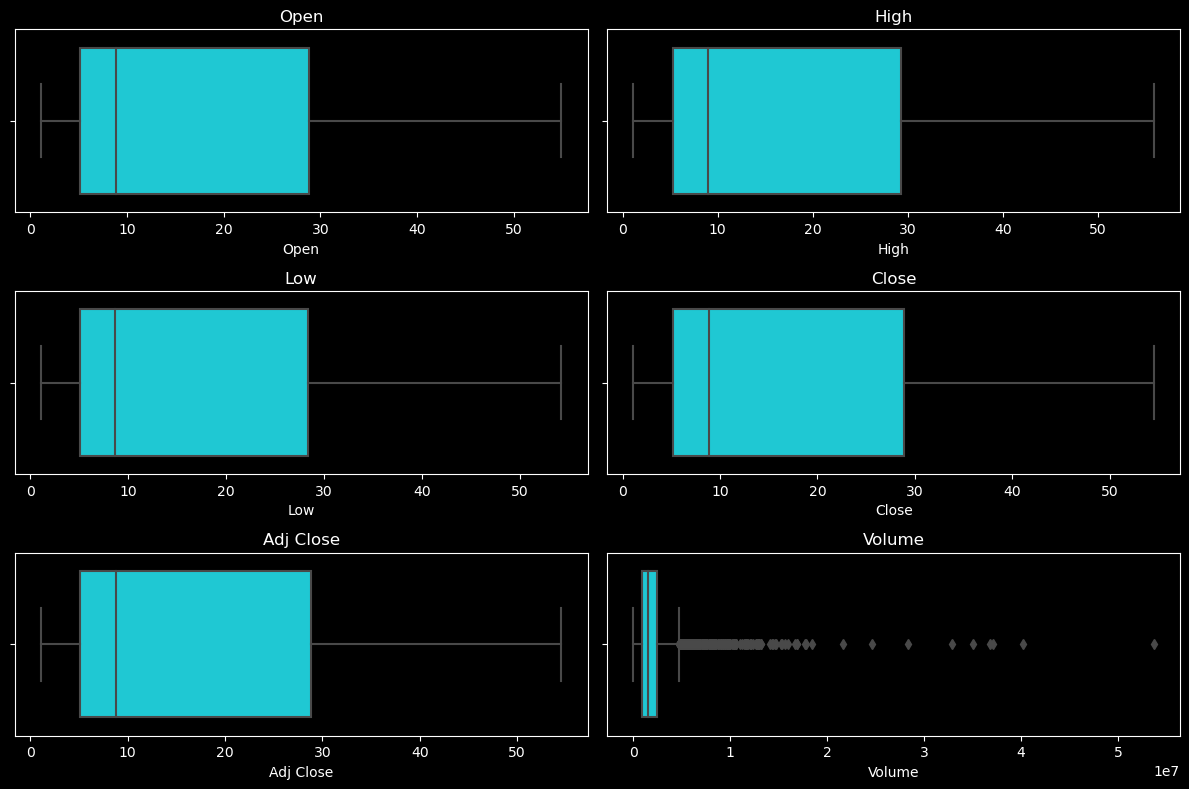

In [128]:
# Selected only the numerical columns
num_df = df.select_dtypes(include = ['float64', 'int64']).columns

# Sets the number of rows and columns of the subplot grid
num_rows = (len(num_df) + 1) // 2
num_cols = 2

# Set the background color
plt.style.use('dark_background')

# Create the subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axs = axs.flatten()

# Creates a boxplot on each subplot
for i, col in enumerate(num_df):
    sns.boxplot(x = df[col], ax = axs[i], color = '#01E3F1')
    axs[i].set_title(col)

# Adjust spacings between subplots and display the graph
plt.tight_layout()
plt.show()

### Remove 'Volume' Outliers

In [129]:
mean = df['Volume'].mean()
std = df['Volume'].std()
df = df[(df['Volume'] > (mean - std)) & (df['Volume'] < (mean + std))]

# 📊 Visualization
---

## Line chart of variables
---

### Open values during the years

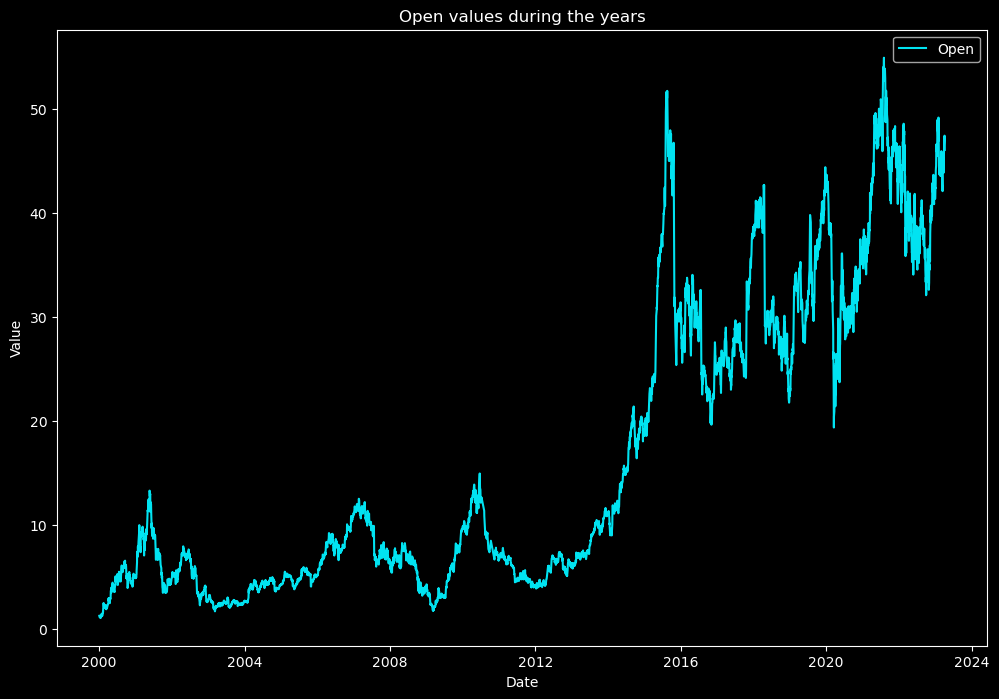

In [130]:
# Set the background color and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# Create lineplot
plt.plot(df['Date'], df['Open'], label = 'Open', color = '#01E3F1')

# Set title, labels and legend
plt.title('Open values during the years')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the graph
plt.show()

### Close values during the years

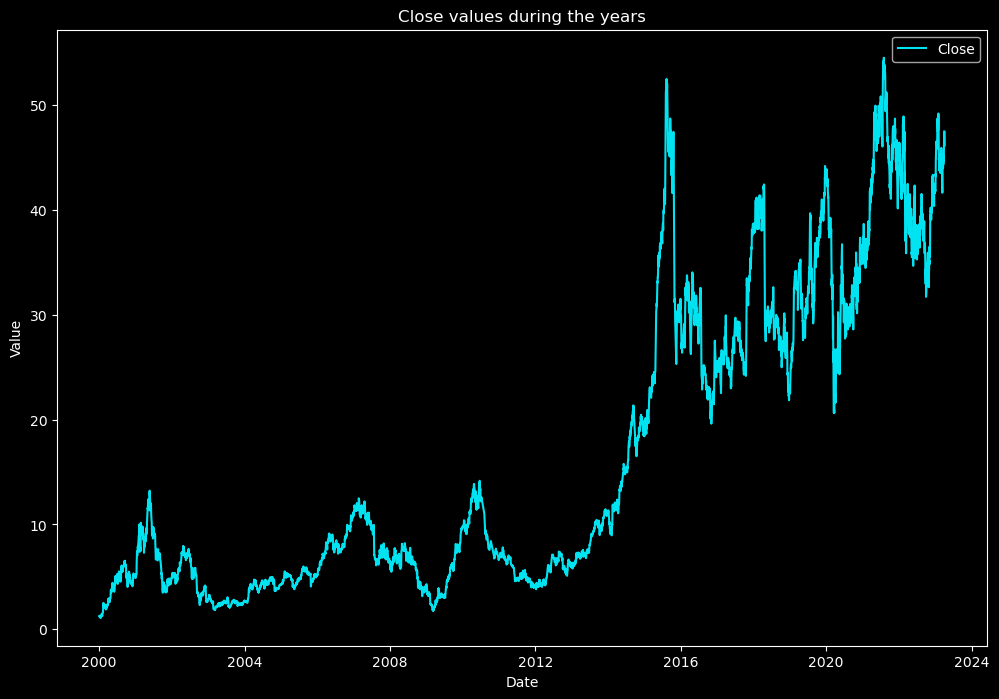

In [131]:
# Set the background color and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# Create lineplot
plt.plot(df['Date'], df['Close'], label = 'Close', color = '#01E3F1')

# Set title, labels and legend
plt.title('Close values during the years')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the graph
plt.show()

### Low values during the years

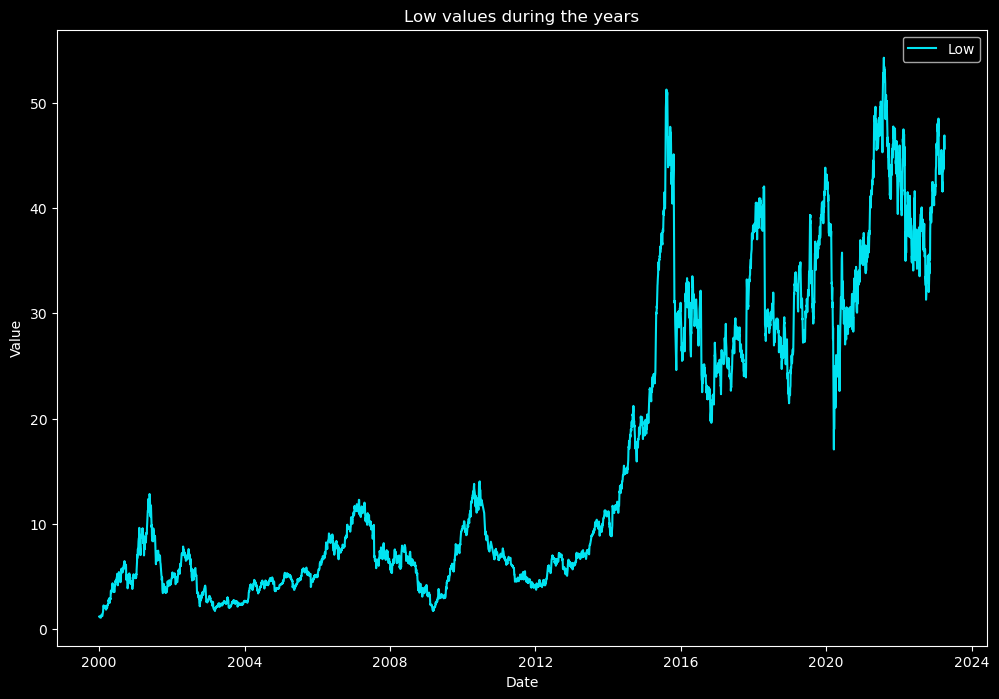

In [132]:
# Set the background color and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# Create lineplot
plt.plot(df['Date'], df['Low'], label = 'Low', color = '#01E3F1')

# Set title, labels and legend
plt.title('Low values during the years')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the graph
plt.show()

### High values during the years

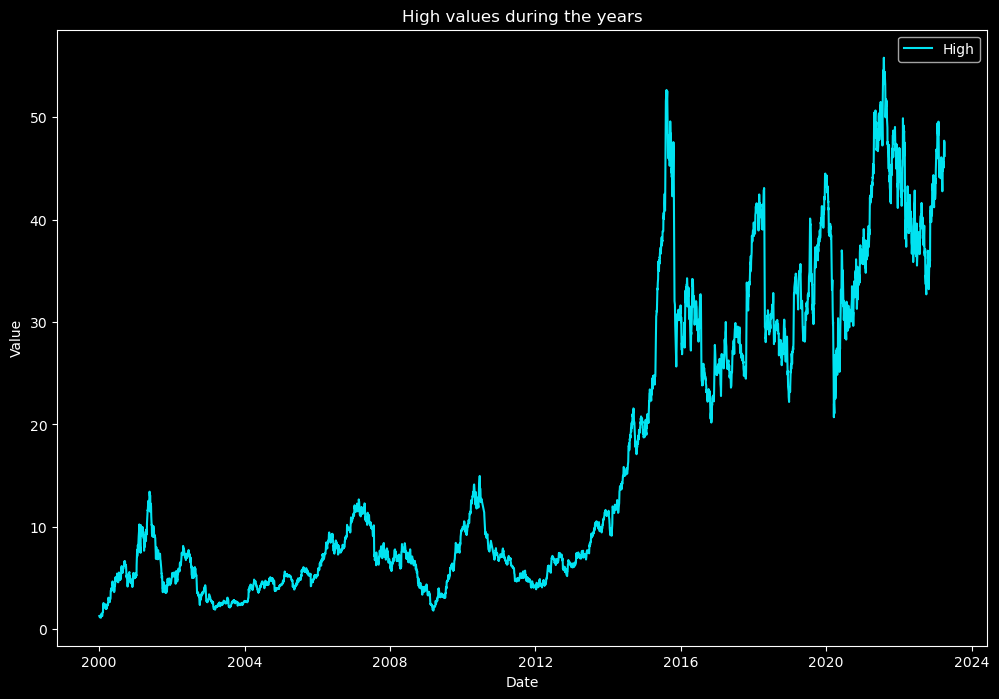

In [133]:
# Set the background color and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# Create lineplot
plt.plot(df['Date'], df['High'], label = 'High', color = '#01E3F1')

# Set title, labels and legend
plt.title('High values during the years')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the graph
plt.show()

## Variables Avarage per Year
---

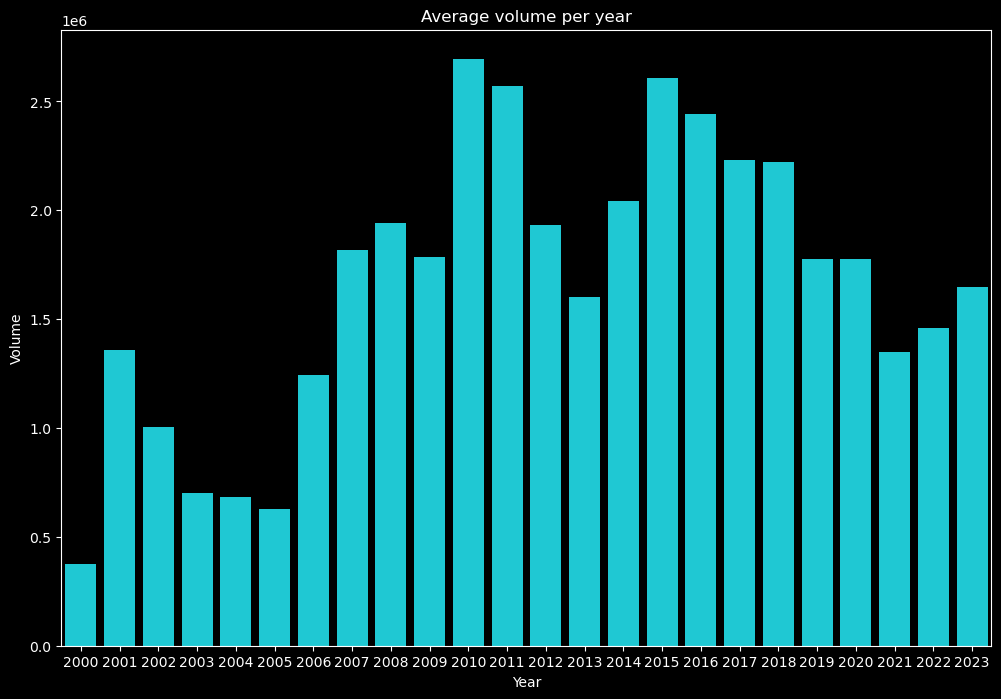

In [134]:
# Set the background color and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# calculation of annual averages
df['Year'] = df['Date'].dt.year
df_mean = df.groupby('Year')[['Volume']].mean()

# Create barplot
sns.barplot(data = df_mean, x = df_mean.index, y = 'Volume', color = '#01E3F1')

# Set title, labels and legend
plt.title('Average volume per year')
plt.xlabel('Year')
plt.ylabel('Volume')

# Show the graph
plt.show()

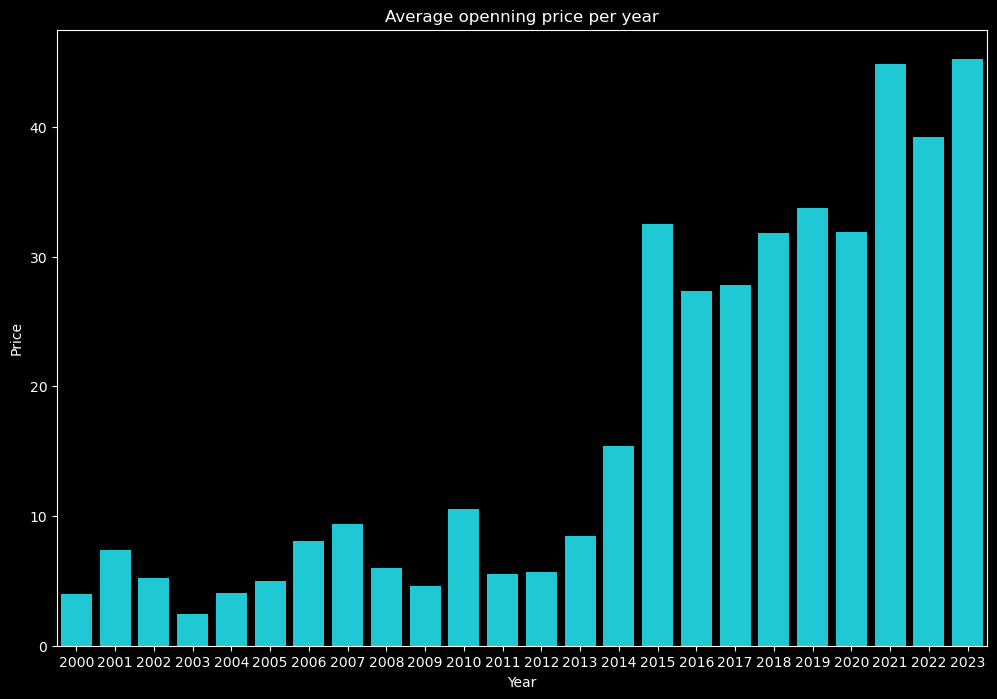

In [135]:
# Set the background color and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# calculation of annual averages
df['Year'] = df['Date'].dt.year
df_mean = df.groupby('Year')[['Open']].mean()

# Create barplot
sns.barplot(data = df_mean, x = df_mean.index, y = 'Open', color = '#01E3F1')

# Set title, labels and legend
plt.title('Average openning price per year')
plt.xlabel('Year')
plt.ylabel('Price')

# Show the graph
plt.show()

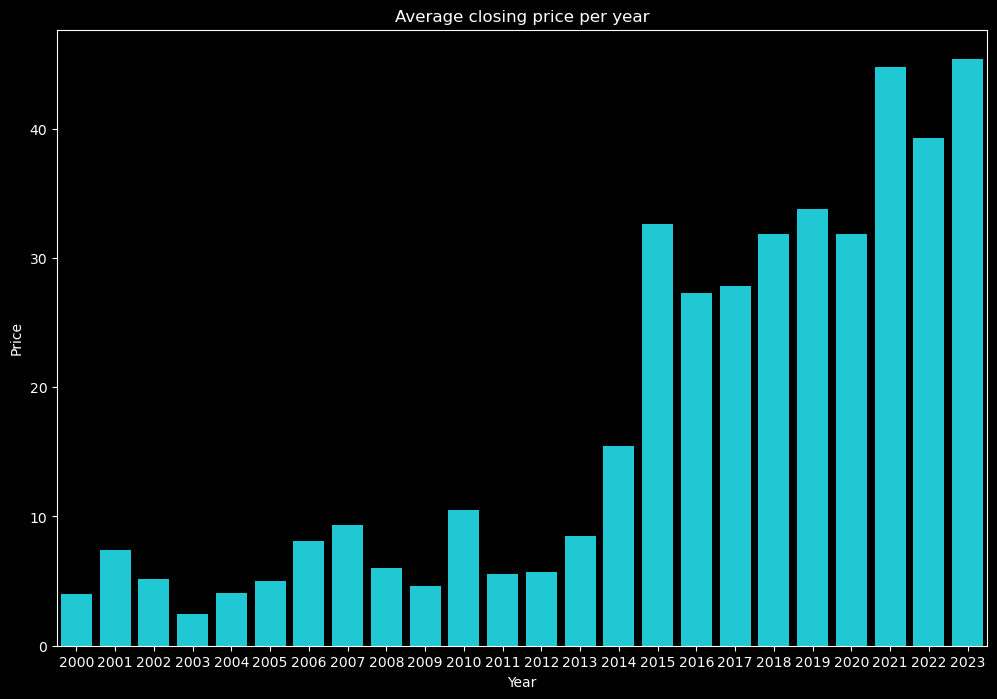

In [136]:
# Set the background color and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# calculation of annual averages
df['Year'] = df['Date'].dt.year
df_mean = df.groupby('Year')[['Close']].mean()

# Create barplot
sns.barplot(data = df_mean, x = df_mean.index, y = 'Close', color = '#01E3F1')

plt.title('Average closing price per year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

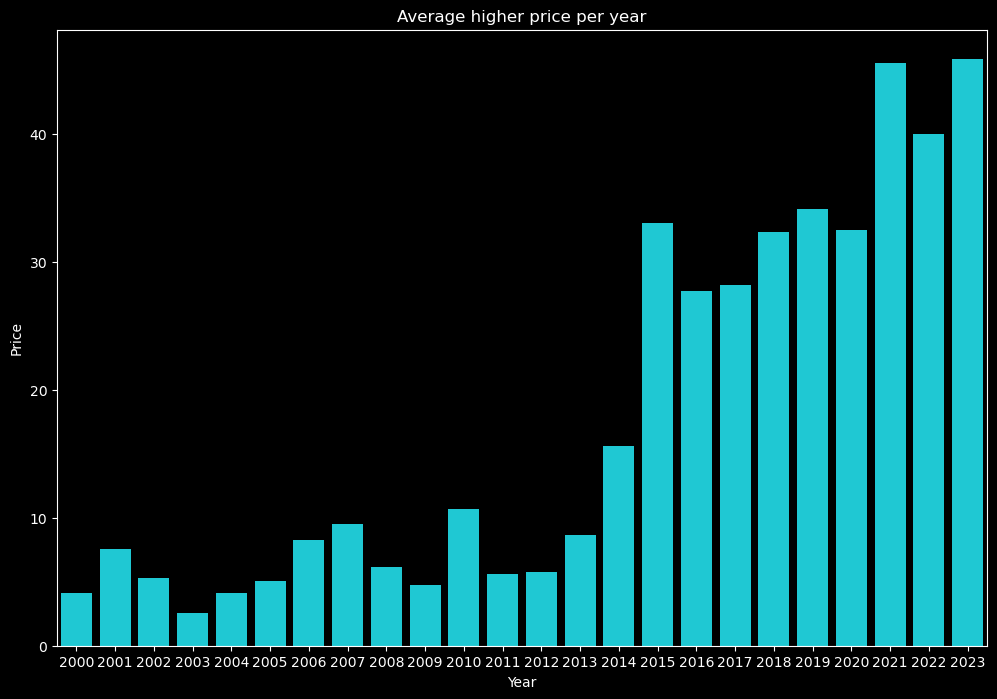

In [137]:
# Set the background color and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# calculation of annual averages
df['Year'] = df['Date'].dt.year
df_mean = df.groupby('Year')[['High']].mean()

# Create barplot
sns.barplot(data = df_mean, x = df_mean.index, y = 'High', color = '#01E3F1')

plt.title('Average higher price per year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

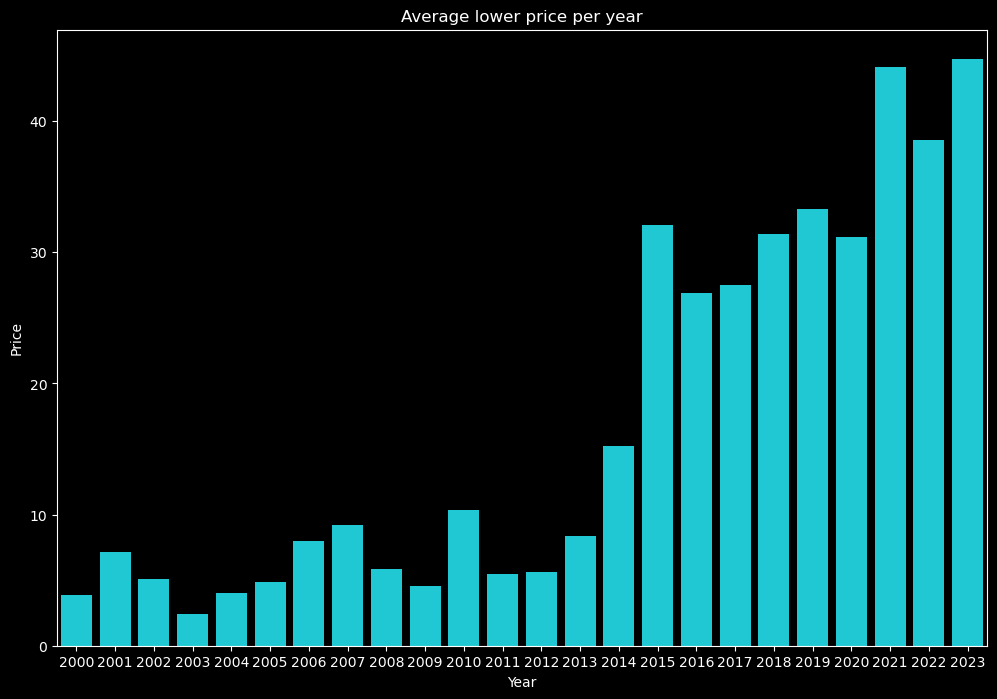

In [138]:
# Set the background color and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# calculation of annual averages
df['Year'] = df['Date'].dt.year
df_mean = df.groupby('Year')[['Low']].mean()

# Create barplot
sns.barplot(data = df_mean, x = df_mean.index, y = 'Low', color = '#01E3F1')

# Set title, labels and legend
plt.title('Average lower price per year')
plt.xlabel('Year')
plt.ylabel('Price')

# Show the graph
plt.show()

## Comparing variables
---

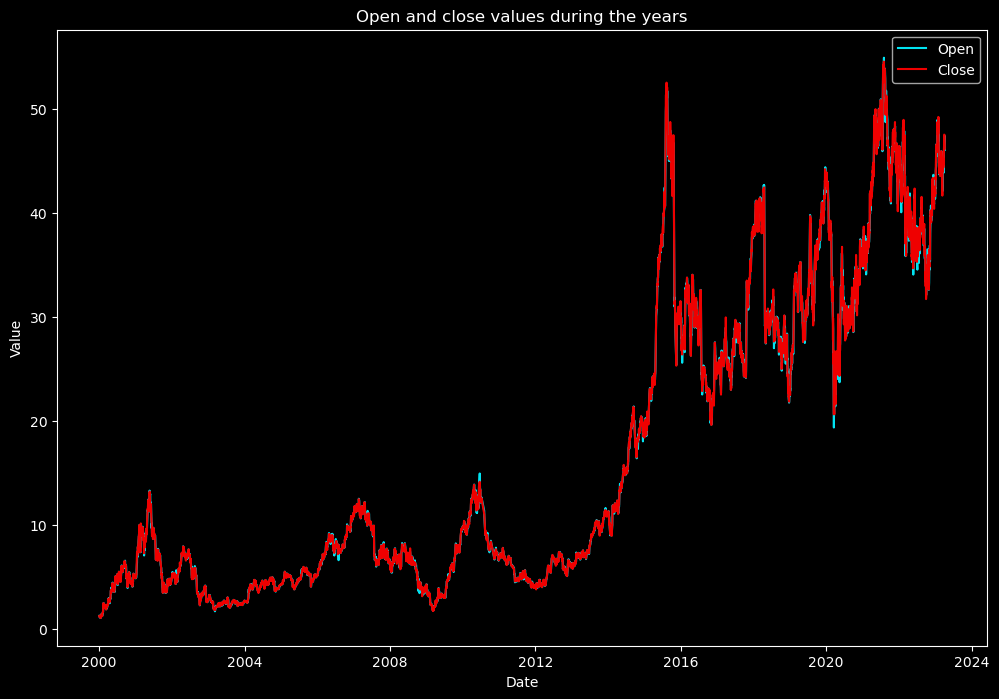

In [139]:
# Set the background color and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# Create lineplot
plt.plot(df['Date'], df['Open'], label = 'Open', color = '#01E3F1')
plt.plot(df['Date'], df['Close'], label = 'Close', color = '#EF0000')

# Set title, labels and legend
plt.title('Open and close values during the years')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the graph
plt.show()

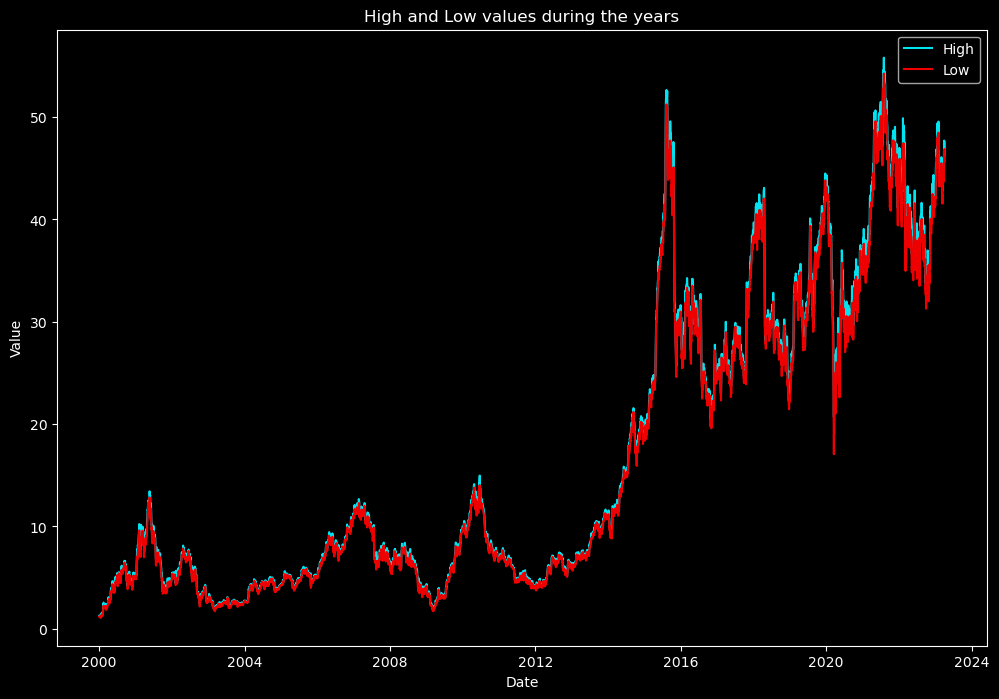

In [140]:
# Set the background color and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# Create lineplot
plt.plot(df['Date'], df['High'], label = 'High', color = '#01E3F1')
plt.plot(df['Date'], df['Low'], label = 'Low', color = '#EF0000')

# Set title, labels and legend
plt.title('High and Low values during the years')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the graph
plt.show()

### Comparing Open, Low, High and Close values

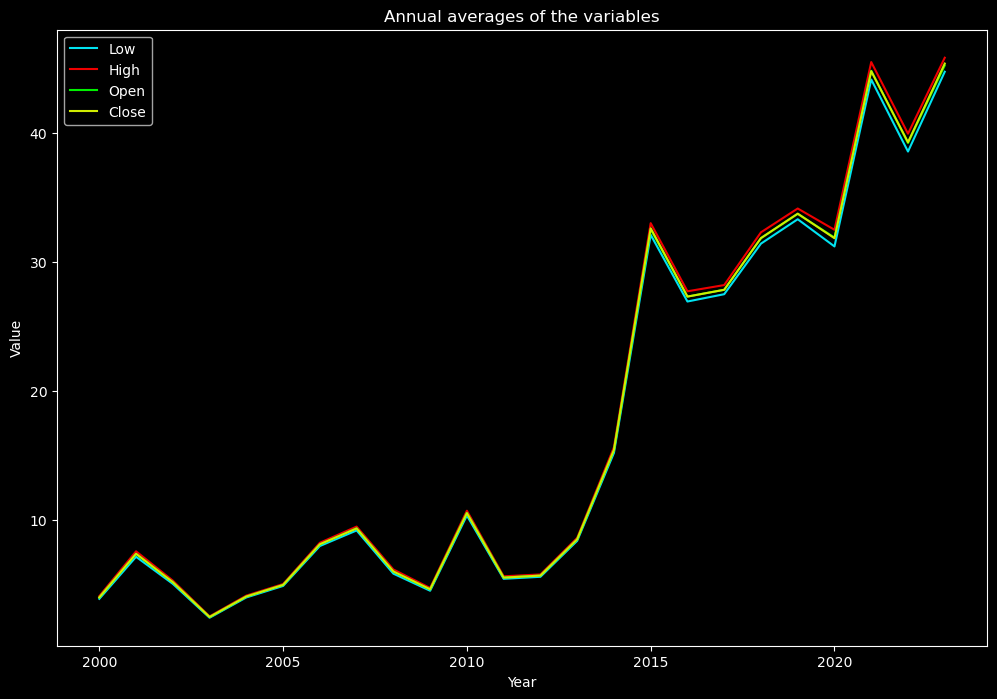

In [141]:
# Set the background color and figure size
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# calculation of annual averages
df_media = df.groupby(df['Date'].dt.year).mean()

# Create lineplot
plt.plot(df_media.index, df_media['Low'], label = 'Low', color = '#01E3F1')
plt.plot(df_media.index, df_media['High'], label = 'High', color = '#EF0000')
plt.plot(df_media.index, df_media['Open'], label = 'Open', color = '#00EF00')
plt.plot(df_media.index, df_media['Close'], label = 'Close', color = '#D0EC01')

# Set title, labels and legend
plt.title('Annual averages of the variables')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

# Show the graph
plt.show()

# 📋 Insights:

- Comparing closing, opening, minimum and maximum prices, visually, they have very similar values.
- The highest price peak occurred in 2023 with an average greater than R$40.00 and the lowest occurred in 2003 with an average lower than 5.00.

- By plotting the closing and opening prices of Skechers over time, we can identify that the price has had an upward trend since 2015.

- Analyzing the opening, maximum, minimum and closing prices before 2015, we can identify that there is a resistance level below R$ 10.00, and from 2015, prices increased from 25.00.

- From historical data, it is possible to identify patterns in price variation, such as seasonal cycles or short-term movements. These patterns can help you make predictions of future stock performance and better understand behavior to make buy or sell decisions.

# 🏁 Thank you! Feel free to criticize! 🏁